## A tutorial with tips on using the <b>guru18</b> ieng6 server
#### Author: Jenny Hamer

### We begin with a summary of instructions on using <i> guru18</i>, followed by step-by-step instructions. Additionally references and resources are listed at the bottom of this tutorial.
Please feel free to contact me with any questions!

### Table of Contents:
<a href='#intro'><b>I. Introduction</b></a> 
><a href='#notes'><b>I.i Notes</b></a>

<a href='#summary'><b>II. Summary of instructions to login</b></a>

<a href='#step-by-step'><b>III. Step-by-step with sample output</b></a>
><a href='#ssh'><b>III.i SSH and prep</b></a>
>><a href='#fore-back'><b>III.ii Foreground vs. Background containers</b></a> 
>>><a href='#launch-env'><b>III.iii Launch an environment and resource allocation</b></a>
>>>><a href='#rsc-lim'><b>III.iv Resource limits</b></a>


<a href='#ref'><b>A. References and Appendix</b></a>

<a id='intro'></a>
# I. Introduction:

We will be using ieng6 server provided by ITS (formerly ACMS) with Kubernetes while we wait for Neil's return. Kubernetes is, in essence, a fancy wrapper around a Docker container which allows for designated computing resources to be assigned to these containers, called <a href='#pod_def'>"pods"</a>. This environment allows your computing to be isolated from other pods and the ieng6 server. <br>

For more details about this and the ITS setup, please visit [this great resource they've created!](https://docs.google.com/document/d/e/2PACX-1vR-tC1oL6J9RJxSP42iWr8BukgRO9ohcybFXPn95yjQQLvv4iNP5Tlbzx06rQtPA-fLex2N_MVjzgAR/pub?embedded=true) <br>

We will describe the process of getting into the computing environment, managing your computing resources, and transferring your data to and from the Kubernetes pod.<br>

<a i='notes'></a>
## I.i Notes:
<b>1)</b> Unless specified in the launch command name, <b>Python2.7 is the default environment</b>. Using the commands which include '3' in them will launch a Python3.5 env with the default settings of those containers (see below). <b>You can also use the command-line argument PY3=yes with the <u>launch.sh</u> command for Py3 environment!</b> <br>

<b>2)</b> PyTorch and TensorFlow should be available when using any of the commands to launch a pod. If you have any issues, you may create a virtual environment and install them there (pip install or conda install). Use this approach for any additional packages you need to use (see the <a href='#ref'><b>references section</b></a> for help). It may be possible to install packages without a virtual environment as well using <u>conda install</u>, but if not, the virtual-env is the way to go. <br>

<b>3)</b> By default, pods stay in "running" or active mode for up to 6 hours, after which they are deleted and any running processes are killed. You may override this and extend the timeout to up to 12 hours by using the parameter <u>K8S_TIMEOUT_SECONDS=43200</u> when creating a pod. If you create a background pod using this parameter, be sure to delete the pod if you are done using it before the 12hr mark, otherwise you will prevent the resources from being used by another student or researcher. If, for some reason, you need to run a model for more than 12 hours, please contact Adam from ITS or me.<br>

<b>4)</b> The command <b>kubectl get pods</b> displays the pods allocated under your account, with NAME (--> pod ID), READY (0/1 = not ready, and 1/1 = ready), STATUS (e.g. RUNNING, IDLE, DeadlineExceeded, etc.), RESTARTS, and AGE (30s, 10m, 2h, etc.). When you finish using the server, you should run this command and verify that you have no containers allotted to you. <br>

<b>5)</b> From the ITS directly:<br>
<b>Please be considerate and terminate idle containers:</b> while containers share system RAM and CPU resources under the standard Linux/Unix model, the cluster’s 80 GPU cards are assigned to users on an exclusive basis.  When attached to a container they become unusable by others even if completely idle.     

<b>6)</b> The popular <b>screen</b> command did not work when Adam and I had been testing the server, but I was just able to "detatch" a screen for the first time on guru18 (as of Jan. 27). You may or may not have success with this, but you're more than welcome to use this if you're able. Please refer to the <a href='#screen'>documentation</a> for more information. <br>

<b>7)</b> You may use Jupyter Notebooks once a pod is created - a URL of the form http://ieng6-201.ucsd.edu:17450/?token=... will be generated when you create a pod, and you can copy-paste this into a browser. You must have a campus IP address or be connected via the <a href='#vpn'>campus VPN</a>. <br>

<b>8)</b> There are 79 GPUs total in the cluster service the ITS has so kindly let us use for our research!

<a i='summary'></a>
## II. Summary of instructions to connect and run a script

<b>1)</b> SSH into your <b>ieng6</b> account. <br>
<b>2)</b> Setup and enable necessary software packages using the <b>prep guru18</b> command. <br>

<b>3)</b> Launch your desired environment - a foreground or background container <a href='#launch-env'>(see details here)</a>.  <br>
><b>3.i)</b> Connect to your background container using <b> kubesh [pod-id]</b>. <br>

<b>4)</b> Activate your virtual environment using <b>source activate [my-env-name] </b><a href='#v-env'>(see instructions on creating one here)</a> <br>

<b>5)</b> Change directories (cd) into your desired model's location.  <br>
><b>5.i)</b> Be sure to include at least one stdout print statement that your model was successfully loaded (and beginning training/testing/etc). <br>

<b>6)</b> Train your model using <b>nohup python -u [your-model-exec.py] > [training_output_file.txt] &</b> <br>
<b>7)</b> CTRL-C to return to the command-line (nohup will keep your code running) and check that your output file does not contain a runtime error. <br>

<b>8)</b> Continue to work in your directory, open an editor and code, etc. <br>
><b>8.i)</b> Exit from your <i>pod</i> using <b>exit</b> to return to your <u>ieng6</u> home directory. <br>

<b>9)</b> When done training, delete your [background] pod: <br>
><b>9.i)</b> List all pods under your account using <b>kubectl get pods</b>. <br>
><b>9.ii)</b> Delete pods no longer needed with <b>kubectl delete pods [your-pod-id]</b>. <br>

<b>10)</b> Verify that the pod was deleted and that you have no 'dangling', idle pods (trapping resources) with kubectl get pods. <br>
<b>11)</b> Exit out of your ieng6 account with CTRL-D or exit. <br>

<a id='step-by-step'></a>
# III. Step-by-step instructions with sample output

<a id='ssh'></a>
## III.i: SSH and prep guru18
<b>1)</b> Using your Active Directory (AD) username, SSH into your ieng6 account <br>
\> ssh jhamer@ieng6.ucsd.edu <br>
\> Password: <enter your AD acct password> <br>
Once you're in, hit enter to get to the command line. <br>
<b>2)</b> Type the command <b>prep guru</b> to load the necessary software packages to access our server. <br>
It should look like the two screens below:

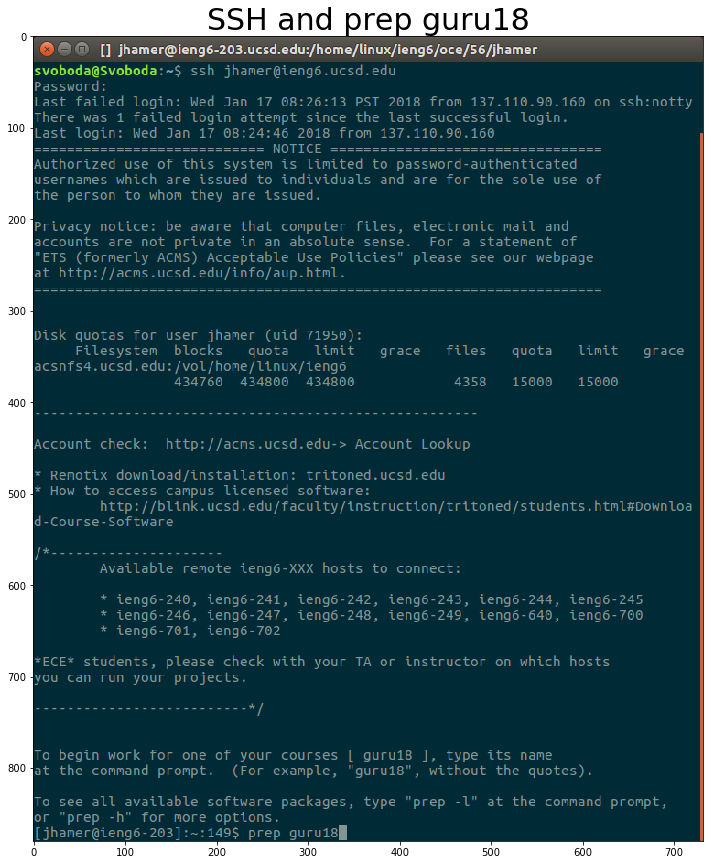

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,18))
img = plt.imread("./1_prep_guru18.png")
plt.imshow(img)
plt.title("SSH and prep guru18", fontsize=30)
plt.show()

<a id='fore-back'></a>
## III.ii Foreground vs. Background Containers

#### Foreground pods:
- are deleted when exited ==> processes currently being run are killed
- automatically connected to when created

#### Background pods:
- once one is created, you may connect to it via the kubesh [pod-name] command via multiple terminal windows
- stays active for 6h, unless this is overridden using the parameter K8S_TIMEOUT_SECONDS=X when creating the pod (X <= 43200 = 12h)
- may be exitted while maintaining running processes: use the 'nohup python ... &' command to keep your process, model training, etc. running in the background (nohup: no hang up; & moves the process from the foreground to the background)
- <b>important to delete</b> once you finish using them (using kubectl delete pods [pod-name]

<a id='launch-env'></a>
## III.iii Launch an environment ("pod") and resource allocation

<i>By default, pods are created with the Python2 (2.7) environment. The two commands containing a '3' launch a Python3.5 environment. You may also add the parameter <b>PY3=yes</b> to the 'launch.sh' command to select a Python3 environment as described below. </i>

### There are 8 environment options to choose from. The following commands create, by default:

<b>launch-py3torch-gpu.sh:</b> a <i>foreground pod</i> with 4 CPU cores, 32 GB RAM, and 1 GPU units and <b><u>Python3 environment</u></b>. <br>

<b>launch-py3torch.sh:</b> a <i>foreground pod</i> with 4 CPU cores, 32 GB RAM, and 1 GPU units and <b><u>Python3 environment</u></b>. <br>

<b>launch-pytorch-bg.sh:</b> a <i>background pod</i> with 4 CPU cores, 32 GB RAM, and 1 GPU units. <br>

<b>launch-pytorch-gpu.sh:</b> a <i>foreground pod</i> with 4 CPU cores, 32 GB RAM, and 1 GPU units. <br>

<b>launch-pytorch.sh:</b> a <i>foreground pod</i> with 4 CPU cores, 16 GB RAM, and 0 GPU units. <br>

<b>launch-tf-gpu.sh:</b> a <i>foreground pod</i> with 4 CPU cores, 32 GB RAM, and 1 GPU units. <br>

<b>launch-tf.sh:</b> a <i>foreground pod</i> with 2 CPU cores, 16 GB RAM, and 0 GPU units. <br>

<b>launch.sh:</b> a <i>foreground pod</i> with 1 CPU cores, 1 GB RAM, and 0 GPU units. <br>


The <b>launch.sh</b> command is fully parametrizable - you may use command-line arguments to modify the resources allotted to it, launch a Python3 environment, and instantiate the pod as a <b>background</b> container. <br>

### Parameters (for use with launch.sh - case-sensitive):
<b>K8S_NUM_CPU</b>=X  <br>
<b>K8S_NUM_GPU</b>=X  <br>
<b>K8S_GB_MEM</b>=X   <br>
<b>SPAWN_INTERACTIVE_SHELL</b>=[YES/NO]  <br>
<b>PROXY_ENABLED</b>=[YES/NO]  <br>
<b>K8S_TIMEOUT_SECONDS</b>=[up to 43200, or 12h] <br>
<b>PY3</b>=YES --> launch a Python3 environment  <br>

### Example commands:
#### <b>Ex 1:</b>  Launch a background pod which will stay alive even after the shell exits, with 1 CPU, 1 GPU, and 16 GB of RAM. <b>No Jupyter notebook access</b> with this one.<br> 
\> K8S_NUM_CPU=1 K8S_NUM_GPU=1 K8S_GB_MEM=16 SPAWN_INTERACTIVE_SHELL=NO PROXY_ENABLED=NO launch.sh <br>

#### <b>Ex 2:</b> Launch a background pod <b>with Jupyter</b> notebook proxy (you can parametrize the resource allocation as desired) <br>
\> PROXY_ENABLED=YES SPAWN_INTERACTIVE_SHELL=NO launch.sh <br> 
(Note that the Jupyter proxy is available until you exit the shell; then, only the background pod remains active)

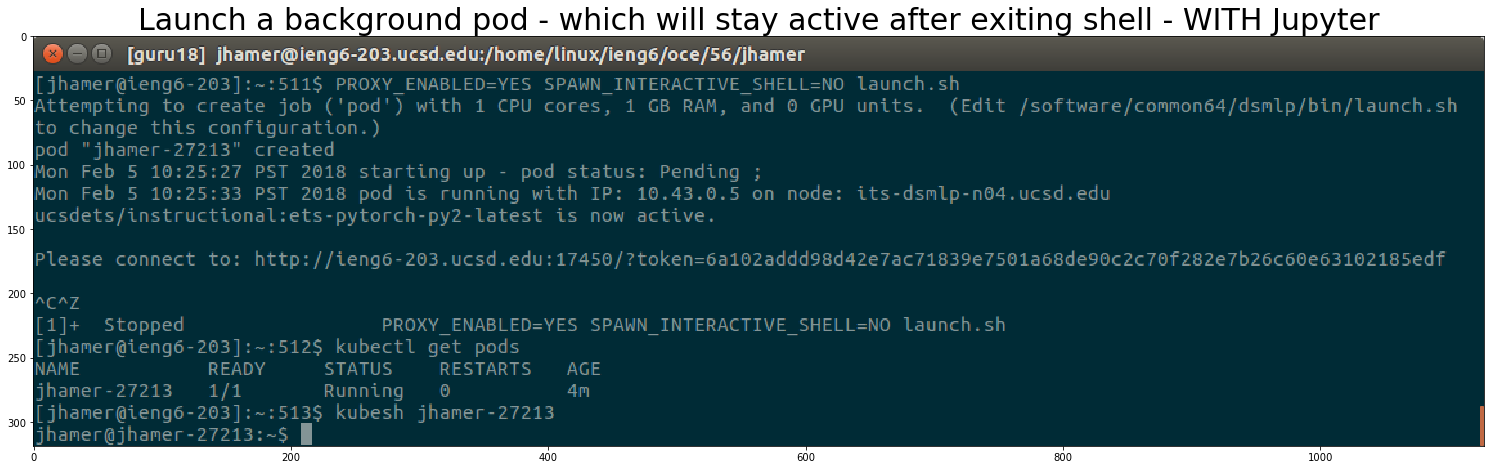

In [2]:
plt.figure(figsize=(26,20))
img = plt.imread("./launch_background_pod_with_jupyter.png")
plt.imshow(img)
plt.title("Launch a background pod - which will stay active after exiting shell - WITH Jupyter", fontsize=30)
plt.show()

<a id='rsc-lim'></a>
## III.iii Resource Limits

At any given time, you may use up to a maximum of: <br>
<space>--<space> <b>8 CPUs</b> <br>
<space>--<space> <b>64 GB of RAM</b> <br>
<space>--<space> <b>2 GPUs</b> <br>

Even though each account is allowed a maximum of 64GB of RAM at a time, a single pod can be allotted at most of 32GB of RAM. So for example, you may run 2x 4 CPU-core containers, 1 container with 8 CPUs, etc.  <br>

You may monitor your resource consumption when running processes using the <b>nvidia-smi</b> command: <br>

\> nvidia-smi [-l] # using -l does a refresh of nvidia-smi output in a 1-second loop by default 1-second loop <br>

\> watch nvidia-smi # will run the 'nvidia-smi' command periodically and "highlight changes" <br>

<a id='ref'></a>
# A. References and Appendix
    
<a id='its'></a>
#### For more details from the ITS setup, please visit [this great resource they've created!](https://docs.google.com/document/d/e/2PACX-1vR-tC1oL6J9RJxSP42iWr8BukgRO9ohcybFXPn95yjQQLvv4iNP5Tlbzx06rQtPA-fLex2N_MVjzgAR/pub?embedded=true) <br>

<a id='pod_def'></a>
#### Pod (definition from Kubernetes):
A <i>pod</i> (as in a pod of whales or pea pod) is a group of one or more containers (such as Docker containers), with shared storage/network, and a specification for how to run the containers. A pod’s contents are always co-located and co-scheduled, and run in a shared context. A pod models an application-specific “logical host” - it contains one or more application containers which are relatively tightly coupled — in a pre-container world, they would have executed on the same physical or virtual machine.
While Kubernetes supports more container runtimes than just Docker, Docker is the most commonly known runtime, and it helps to describe pods in Docker terms. Learn more about Kubernetes and pods [here!](https://kubernetes.io/docs/concepts/workloads/pods/pod/)

<a id='vpn'></a> 
#### Learn how to set up and use the [UCSD Campus VPN services]
(https://blink.ucsd.edu/technology/network/connections/off-campus/VPN/index.html)

#### Helpful documentation
<a id='v-env'></a>
Create a [<b>virtual environment</b>](https://conda.io/docs/user-guide/tasks/manage-environments.html) with <b>conda</b>

<a id='screen'></a>
[<b>screen</b>](https://www.gnu.org/software/screen/manual/screen.html) documentation

<a id='nohup'></a>
[<b>nohup</b>](https://www.gnu.org/software/coreutils/manual/html_node/nohup-invocation.html) documentation